# Illegal Dump Sites Data Analysis
## From Faraz Salim

#### About Dataset:
This dataset gives information about illegal dump sites in Allegheny County, which includes the amount of estimated tons that are reported in each neighborhood. It also states the status of the neighborhoods based on cleanliness. For example, completed means that the site was cleaned.

#### Why We Chose This Dataset:
We chose this dataset because it is helpful for determining the healthiest neighborhood in Pittsburgh based on environmental factors, and illegal dump sites can cause many health problems for humans by releasing pollutants into the air as well as water sources. Analyzing this can help determine if an area is healthier than others.

In [303]:
import pandas as pd
import numpy as py 
%matplotlib inline
import matplotlib.pyplot as plt

In [311]:
dump_sites = pd.read_csv("IDS.csv")
dump_sites['estimated_tons'] = pd.to_numeric(dump_sites['estimated_tons'], errors='coerce')
dump_sites = dump_sites.dropna(subset=['estimated_tons'])
dump_sites.head(10)

,site_name,Status,City,Neighborhood,estimated_tons,location_description,latitude,longitude,Unnamed: 8
0,St. Martin Street,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42221971,-79.99022525,NaN
1,Brosville Street,Surveyed,Pittsburgh,Allentown,3.0,NaN,40.42370101,-79.98657393,NaN
2,McCain Street,Surveyed,Pittsburgh,Allentown,1.0,NaN,40.42427063,-79.99022675,NaN
3,Ceres Way,Surveyed,Pittsburgh,Allentown,0.5,NaN,40.42327242,-79.99248958,NaN
4,Eureka Street,Completed,Pittsburgh,Allentown,0.1,NaN,40.42372131,-79.99478912,NaN
5,222 Walter Street,Completed,Pittsburgh,Allentown,5.0,dump is in deteriorated garage,40.42022451,-79.99477699,NaN
6,Grimes and Elsinburg,Completed,Pittsburgh,Allentown,0.3,"residential street, across the street from a s...",40.41544068,-79.99297857,NaN
7,Parkwood Road Site 1,Surveyed,Pittsburgh,Arlington,3.0,NaN,40.41068203,-79.96578013,NaN
8,Parkwood Road Site 2,Surveyed,Pittsburgh,Arlington,4.0,NaN,40.41144932,-79.96714085,NaN
9,Parkwood Road Site 3,Completed,Pittsburgh,Arlington,2.5,NaN,40.41397095,-79.97727203,NaN


In [313]:
dump_sites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 835 entries, 0 to 883
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site_name             835 non-null    object 
 1   Status                835 non-null    object 
 2   City                  835 non-null    object 
 3   Neighborhood          835 non-null    object 
 4   estimated_tons        835 non-null    float64
 5   location_description  188 non-null    object 
 6   latitude              833 non-null    object 
 7   longitude             833 non-null    object 
 8   Unnamed: 8            0 non-null      float64
dtypes: float64(2), object(7)
memory usage: 65.2+ KB


### What we did so far: 
1. We imported the needed libraries
2. We loaded the dataset
3. We converted all the data in the estimated tons column into a float datatype
4. We removed all instances in the estimated tons column where there is no value
5. We checked the top 10 values in the dataset to make sure everything is loaded properly
6. We checked the datatype of each category for later use

In [287]:
average = dump_sites.groupby('Neighborhood')['estimated_tons'].mean()
print(average)

Neighborhood
Allentown                 1.485714
Arlington                 1.944444
Avalon                    0.500000
Banksville                1.000000
Barking Slopes            1.500000
                            ...   
Wilkins                   0.766667
Wilkins/Monroeville       1.500000
Wilkinsburg               1.100000
Wilkinsburg/Penn Hills    6.000000
Windgap                   1.333333
Name: estimated_tons, Length: 144, dtype: float64


In [569]:
neighborhood_ar = []
neighborhoods = list(average.keys())
average_all = list(average.values)
average_ar = []
for i in range(len(average_all)):
    if average_all[i] <= 0.5:
        neighborhood_ar.append(neighborhoods[i])
        average_ar.append(average_all[i])
print(average_ar)
print()
print(neighborhood_ar)

[0.5, 0.5, 0.4, 0.3, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 0.5, 0.2, 0.3, 0.5, 0.3, 0.5, 0.5, 0.3, 0.5, 0.5, 0.5, 0.5]

['Avalon', 'Bell Acres', 'Boston', 'Buena Vista', 'Central Oakland', 'East Carnegie', 'East Deer Township', 'Edgeworth', 'Homewood West', 'Indiana/Hampton', 'Kennedy', 'North Park', "O'Hara", 'Pine Township', 'Point Breeze North', 'Sewickley Heights', 'Shaler', 'Strip District', 'Verona/Blawnox', 'West Deer Township', 'Whitaker', 'White Oak']


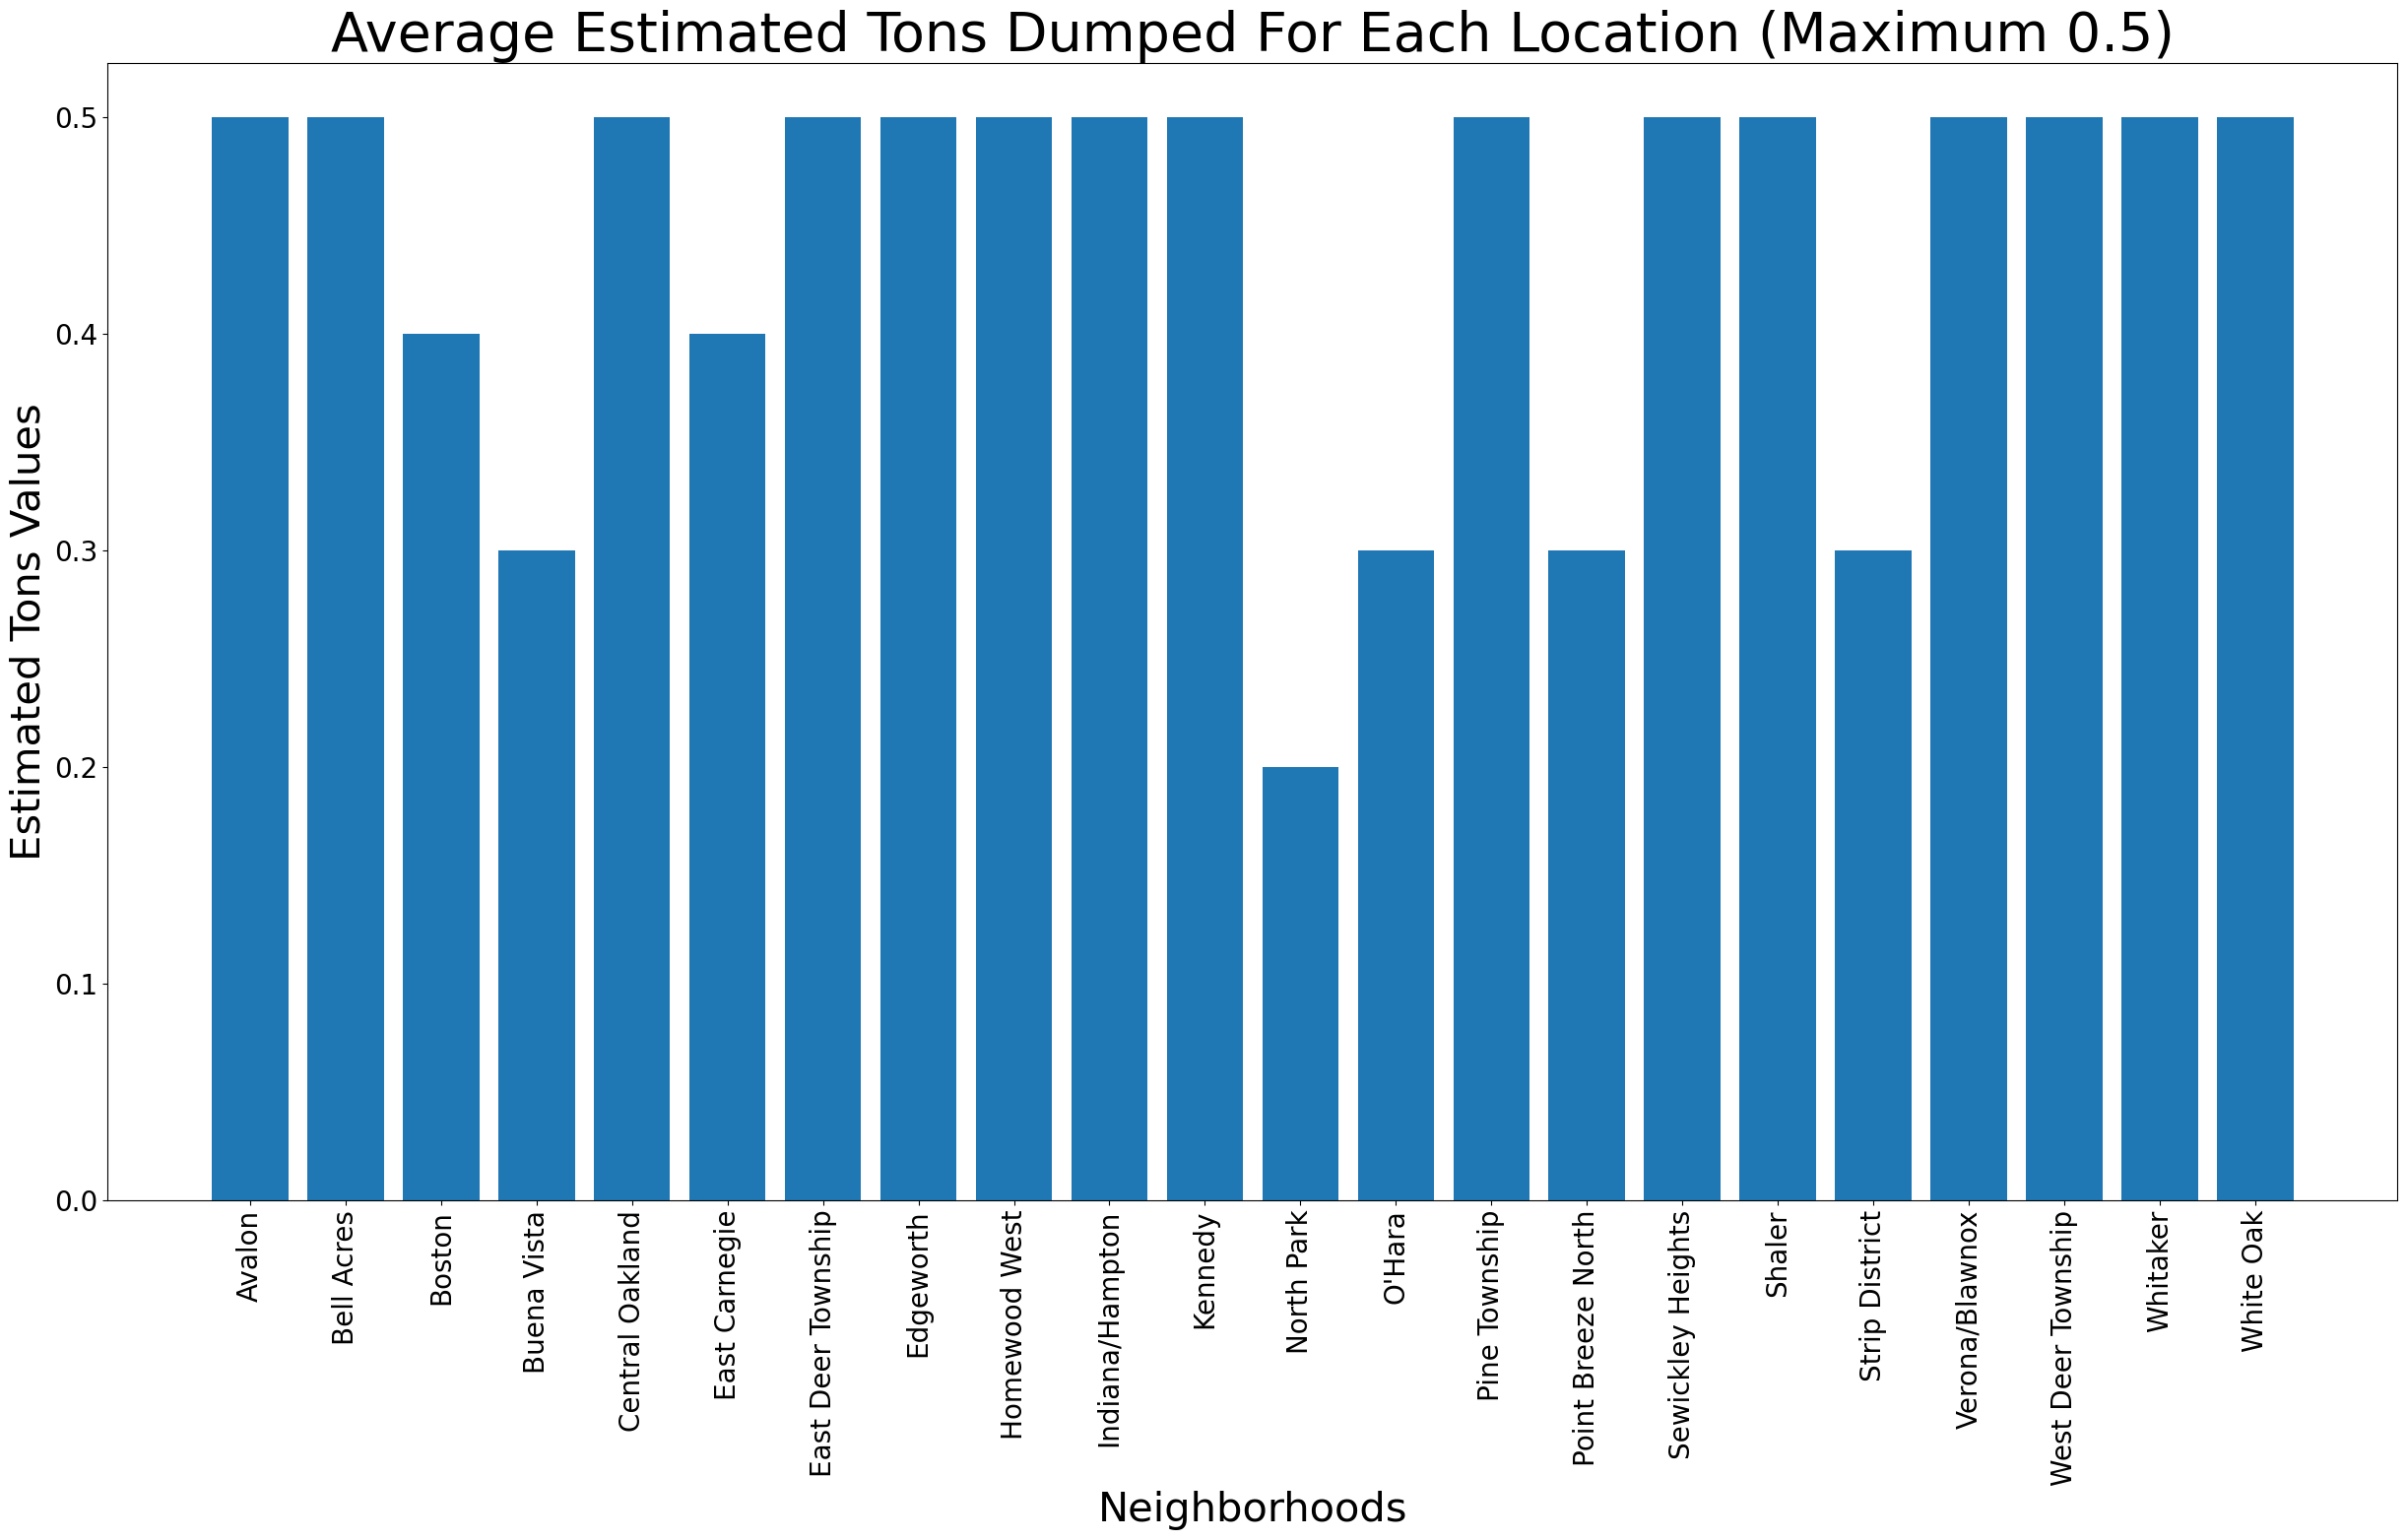

In [567]:
plt.figure(figsize=(30,15))
plt.bar(neighborhood_ar, average_ar)
plt.xticks(fontsize = 20, rotation = 90)
plt.yticks(fontsize = 20)
plt.ylabel("Estimated Tons Values", fontsize = 30)
plt.xlabel("Neighborhoods", fontsize = 30)
plt.title("Average Estimated Tons Dumped For Each Location (Maximum 0.5)", fontsize = 40)
plt.show()

#### What We Accomplished:
1. We found the average estimated tons dumped for each location with the max value being 0.5
2. This was done to narrow the data to only the locations eligible to have the least amount of illegal dump site activity
3. We displayed the values on a graph for easier interpretation
4. We learned that these are the 22 locations that have the lowest estimated tons dumped
5. Out of the 22, North Park, O'Hara, Point Breeze North, Strip District, and Buena Vista are the best 5 in this category.

In [474]:
print(dump_sites["Status"].unique())
print()
ar = []
for i in range(len(dump_sites["Status"])):
    if dump_sites["Status"].iloc[i] == "Completed":
        if dump_sites["Neighborhood"].iloc[i] in neighborhood_ar:
            if dump_sites["Neighborhood"].iloc[i] in ar:
                continue
            else:
                ar.append(dump_sites["Neighborhood"].iloc[i])
print(ar)

['Surveyed' 'Completed' 'Partially Cleaned' 'Tireless Event Location'
 'In Progress']

['East Carnegie', 'Homewood West', 'North Park', 'Point Breeze North']


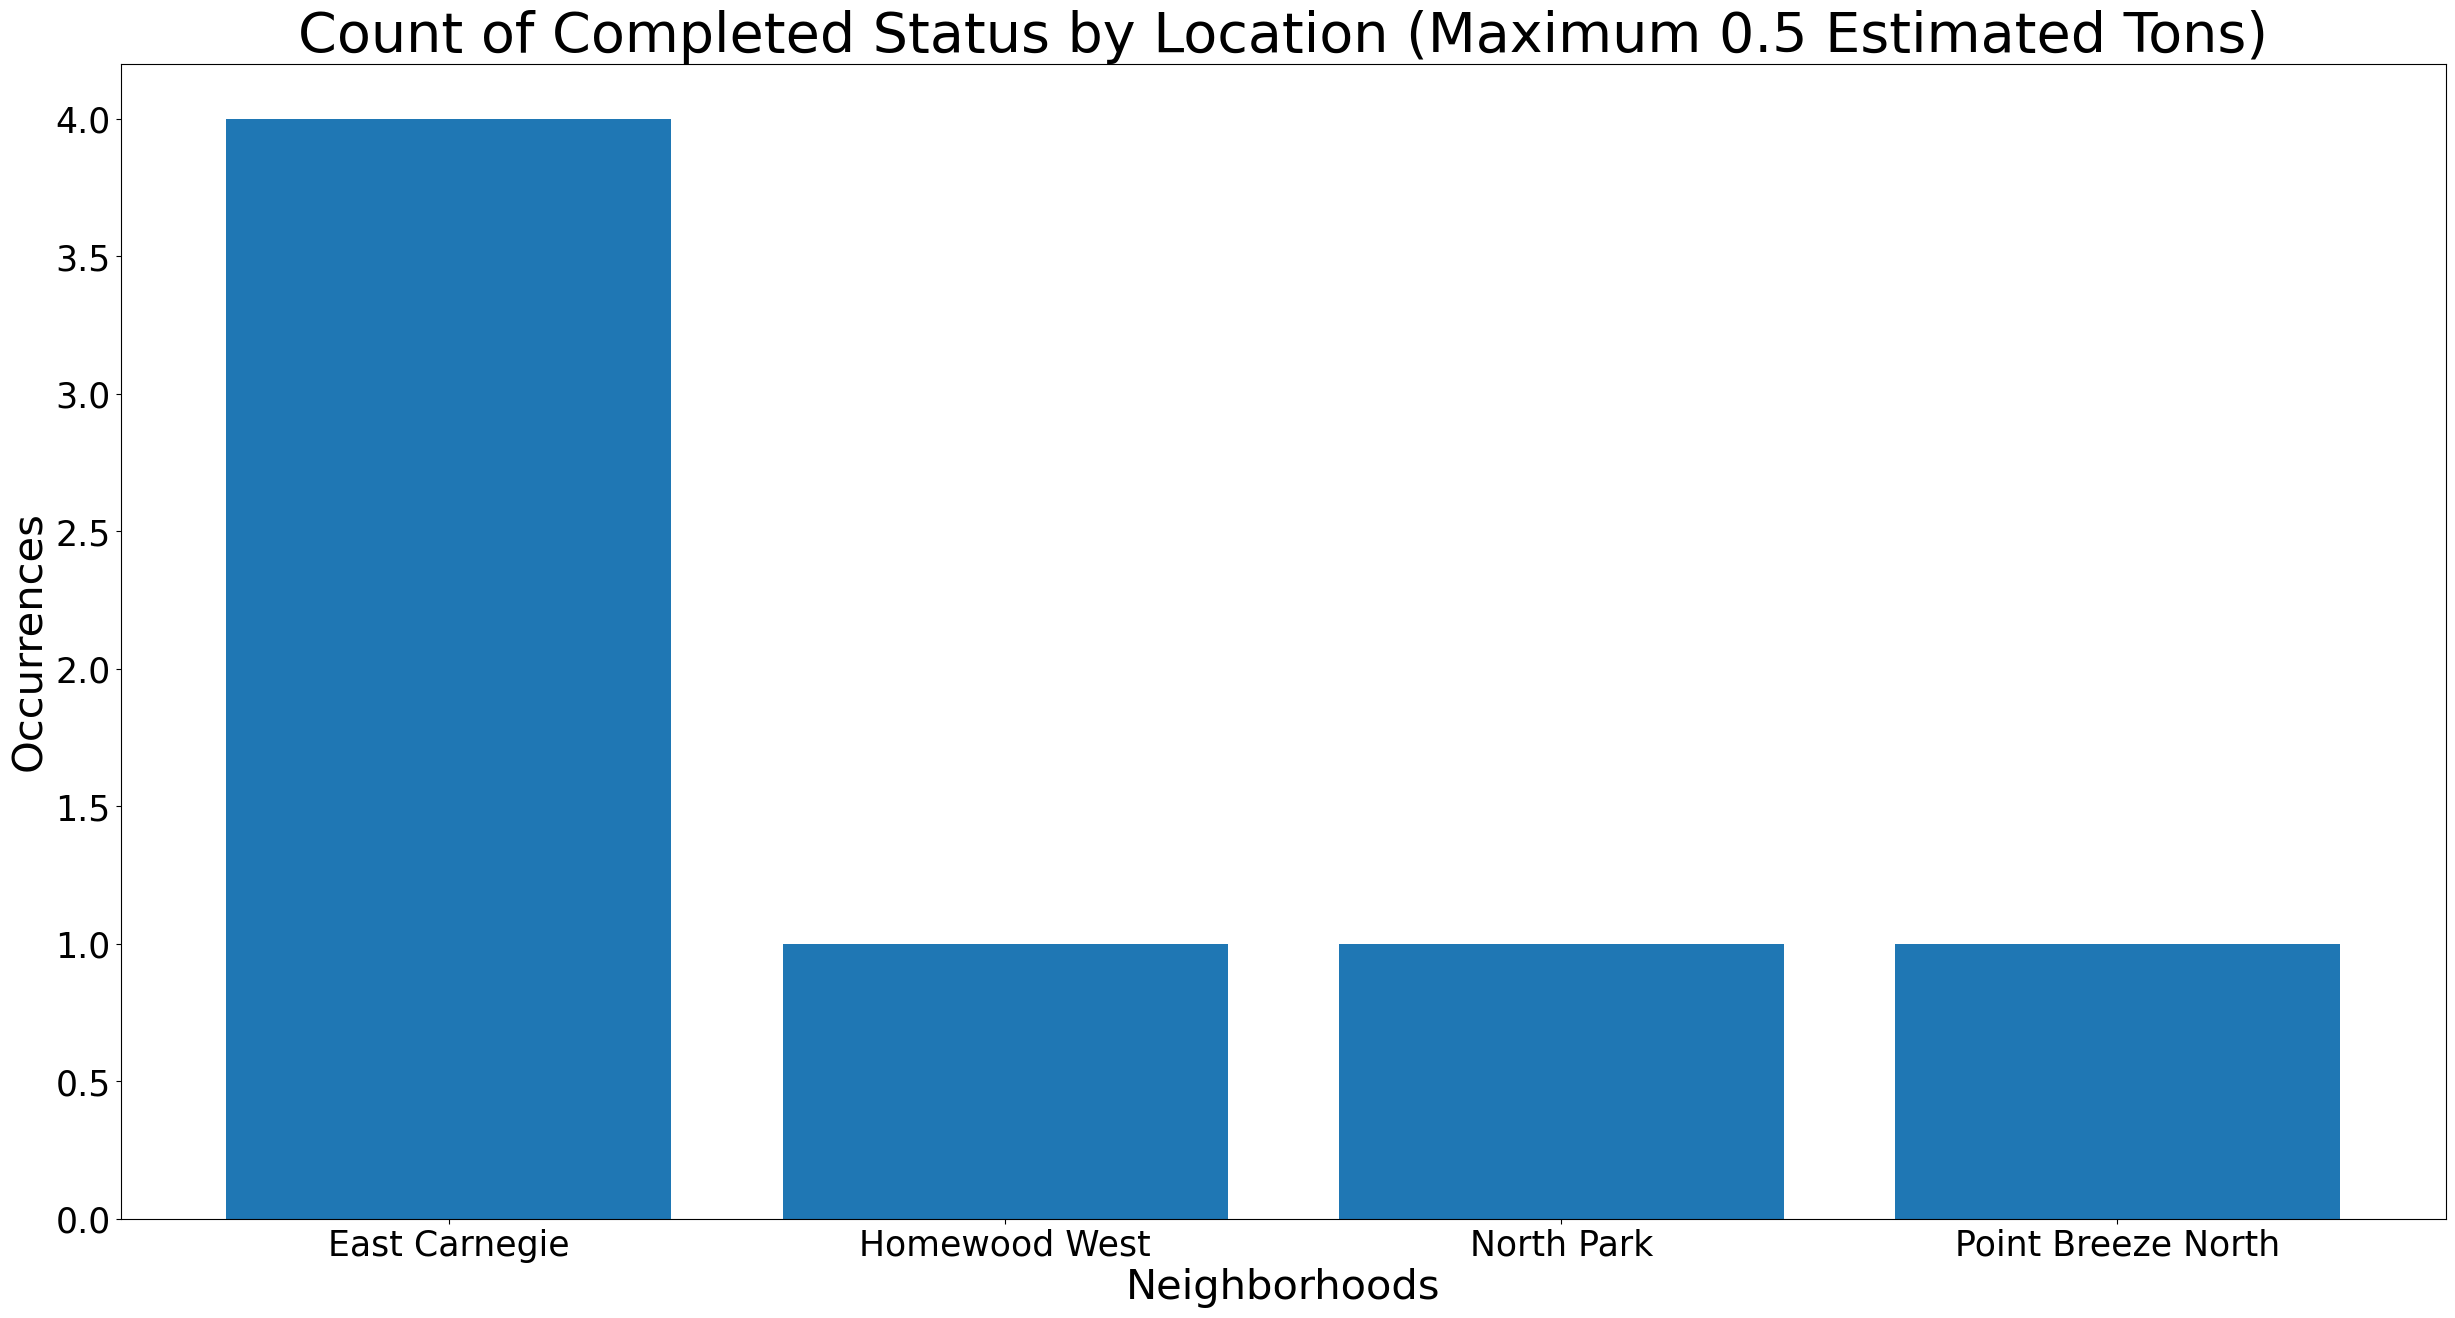

In [563]:
condition1 = dump_sites[dump_sites["Neighborhood"].isin(neighborhood_ar)]
condition2 = condition1[condition1["Status"] == "Completed"].groupby("Neighborhood").size()
plt.figure(figsize=(30,15))
plt.bar(ar, list(condition2.values))
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylabel("Occurrences", fontsize=30)
plt.xlabel("Neighborhoods", fontsize=30)
plt.title("Count of Completed Status by Location (Maximum 0.5 Estimated Tons)", fontsize=40)
plt.show()

In [527]:
east_count = 0
west_count = 0
north_count = 0
breeze_count = 0
for i in range(len(dump_sites['Neighborhood'])):
    if dump_sites['Neighborhood'].iloc[i] == "Point Breeze North":
        breeze_count += 1
    elif dump_sites['Neighborhood'].iloc[i] == "East Carnegie":
        east_count += 1
    elif dump_sites['Neighborhood'].iloc[i] == "North Park":
        north_count += 1
    elif dump_sites['Neighborhood'].iloc[i] == "Homewood West":
        west_count += 1
print("East Carnegie Appearances:", east_count)
print()
print("Homewood West Appearances:", west_count)
print()
print("North Park Appearances:", north_count)
print()
print("Point Breeze North Appearances:", breeze_count)

East Carnegie Appearances: 4

Homewood West Appearances: 1

North Park Appearances: 1

Point Breeze North Appearances: 1


#### What We Accomplished:
1. We found the locations out of the previous 22 that have at least one instance where the dump site has been cleaned
2. We found that 4 out of the 22 locations fulfill that condition
3. We found that every time each of the 4 locations appear, they also have the completed status meaning the site has been cleaned
4. North Park and Point Breeze North are the 2 locations that appear as the best in both graphs, but East Carnegie and Homewood West still appear in both graphs so they are still valid options.

#### Top Four Healthiest Locations From This Dataset (In No Particular Order):
These are the locations that are the best in in all categories tested
1. North Park
2. Point Breeze North
3. East Carnegie
4. Homewood West

### Conclusion:
- The goal of using this dataset is to determine which neighborhoods in Allegheny County have the least impacting illegal dump sites to make a more broad conclusion as to which neighborhood in Pittsburgh is the healthiest.
- In this study, we analyzed the average estimated tons dumped (maximum 0.5) for each neighborhood and which ones out of the top 22 that have a minimum of 1 site cleaned when surveyed.
- These different analytical methods helped us conclude that the top four neighborhoods with the least impacting illegal dump sites are North Park, Point Breeze North, East Carnegie, and Homewood West.
- These neighborhoods will now continue as contenders to be the healthiest neighborhood in Pittsburgh after being compared with the other datasets.